In [1]:
# Графики к лекции 5 ("Модель Хестона")
# 1. Графики влияния параметров на улыбки волатильности
# 2. Калибровка модели

%load_ext autoreload
%autoreload 2
from math import *
import numpy as np
import scipy.stats as st
import matplotlib as mpl
import matplotlib.pyplot as plt

import sys
sys.path.append('../..')

import warnings
warnings.filterwarnings('ignore', category=FutureWarning)

import pyfinmath as fm

plt.rcParams.update({
    "font.size": 11,
    "axes.titlesize": 8,
    "axes.labelsize": 8,
    "xtick.labelsize": 7,
    "ytick.labelsize": 7,
    "legend.fontsize": 7,
    "figure.titlesize": 8,
    "figure.dpi": 600,
    "lines.linewidth": 1,
    "axes.linewidth": 0.6,
    "grid.linewidth": 0.3,
    "xtick.major.width": 0.6,
    "ytick.major.width": 0.6,
    "xtick.minor.width": 0.3,
    "ytick.minor.width": 0.3,
})

scale = 0.9     # Масштаб графиков (меньше 1, чтобы помещались на А4)

## Влияние параметров на улыбки волатильности

In [2]:
# Базовая модель
s = 1
v = 0.09
kappa = 2
theta = 0.09
sigma = 1
rho = -0.5
t0, t1 = 0.25, 2
model = fm.Heston(v, kappa, theta, sigma, rho)
K1 = np.linspace(0.65, 1.35, 50)
K2 = np.linspace(0.45, 1.6, 50)

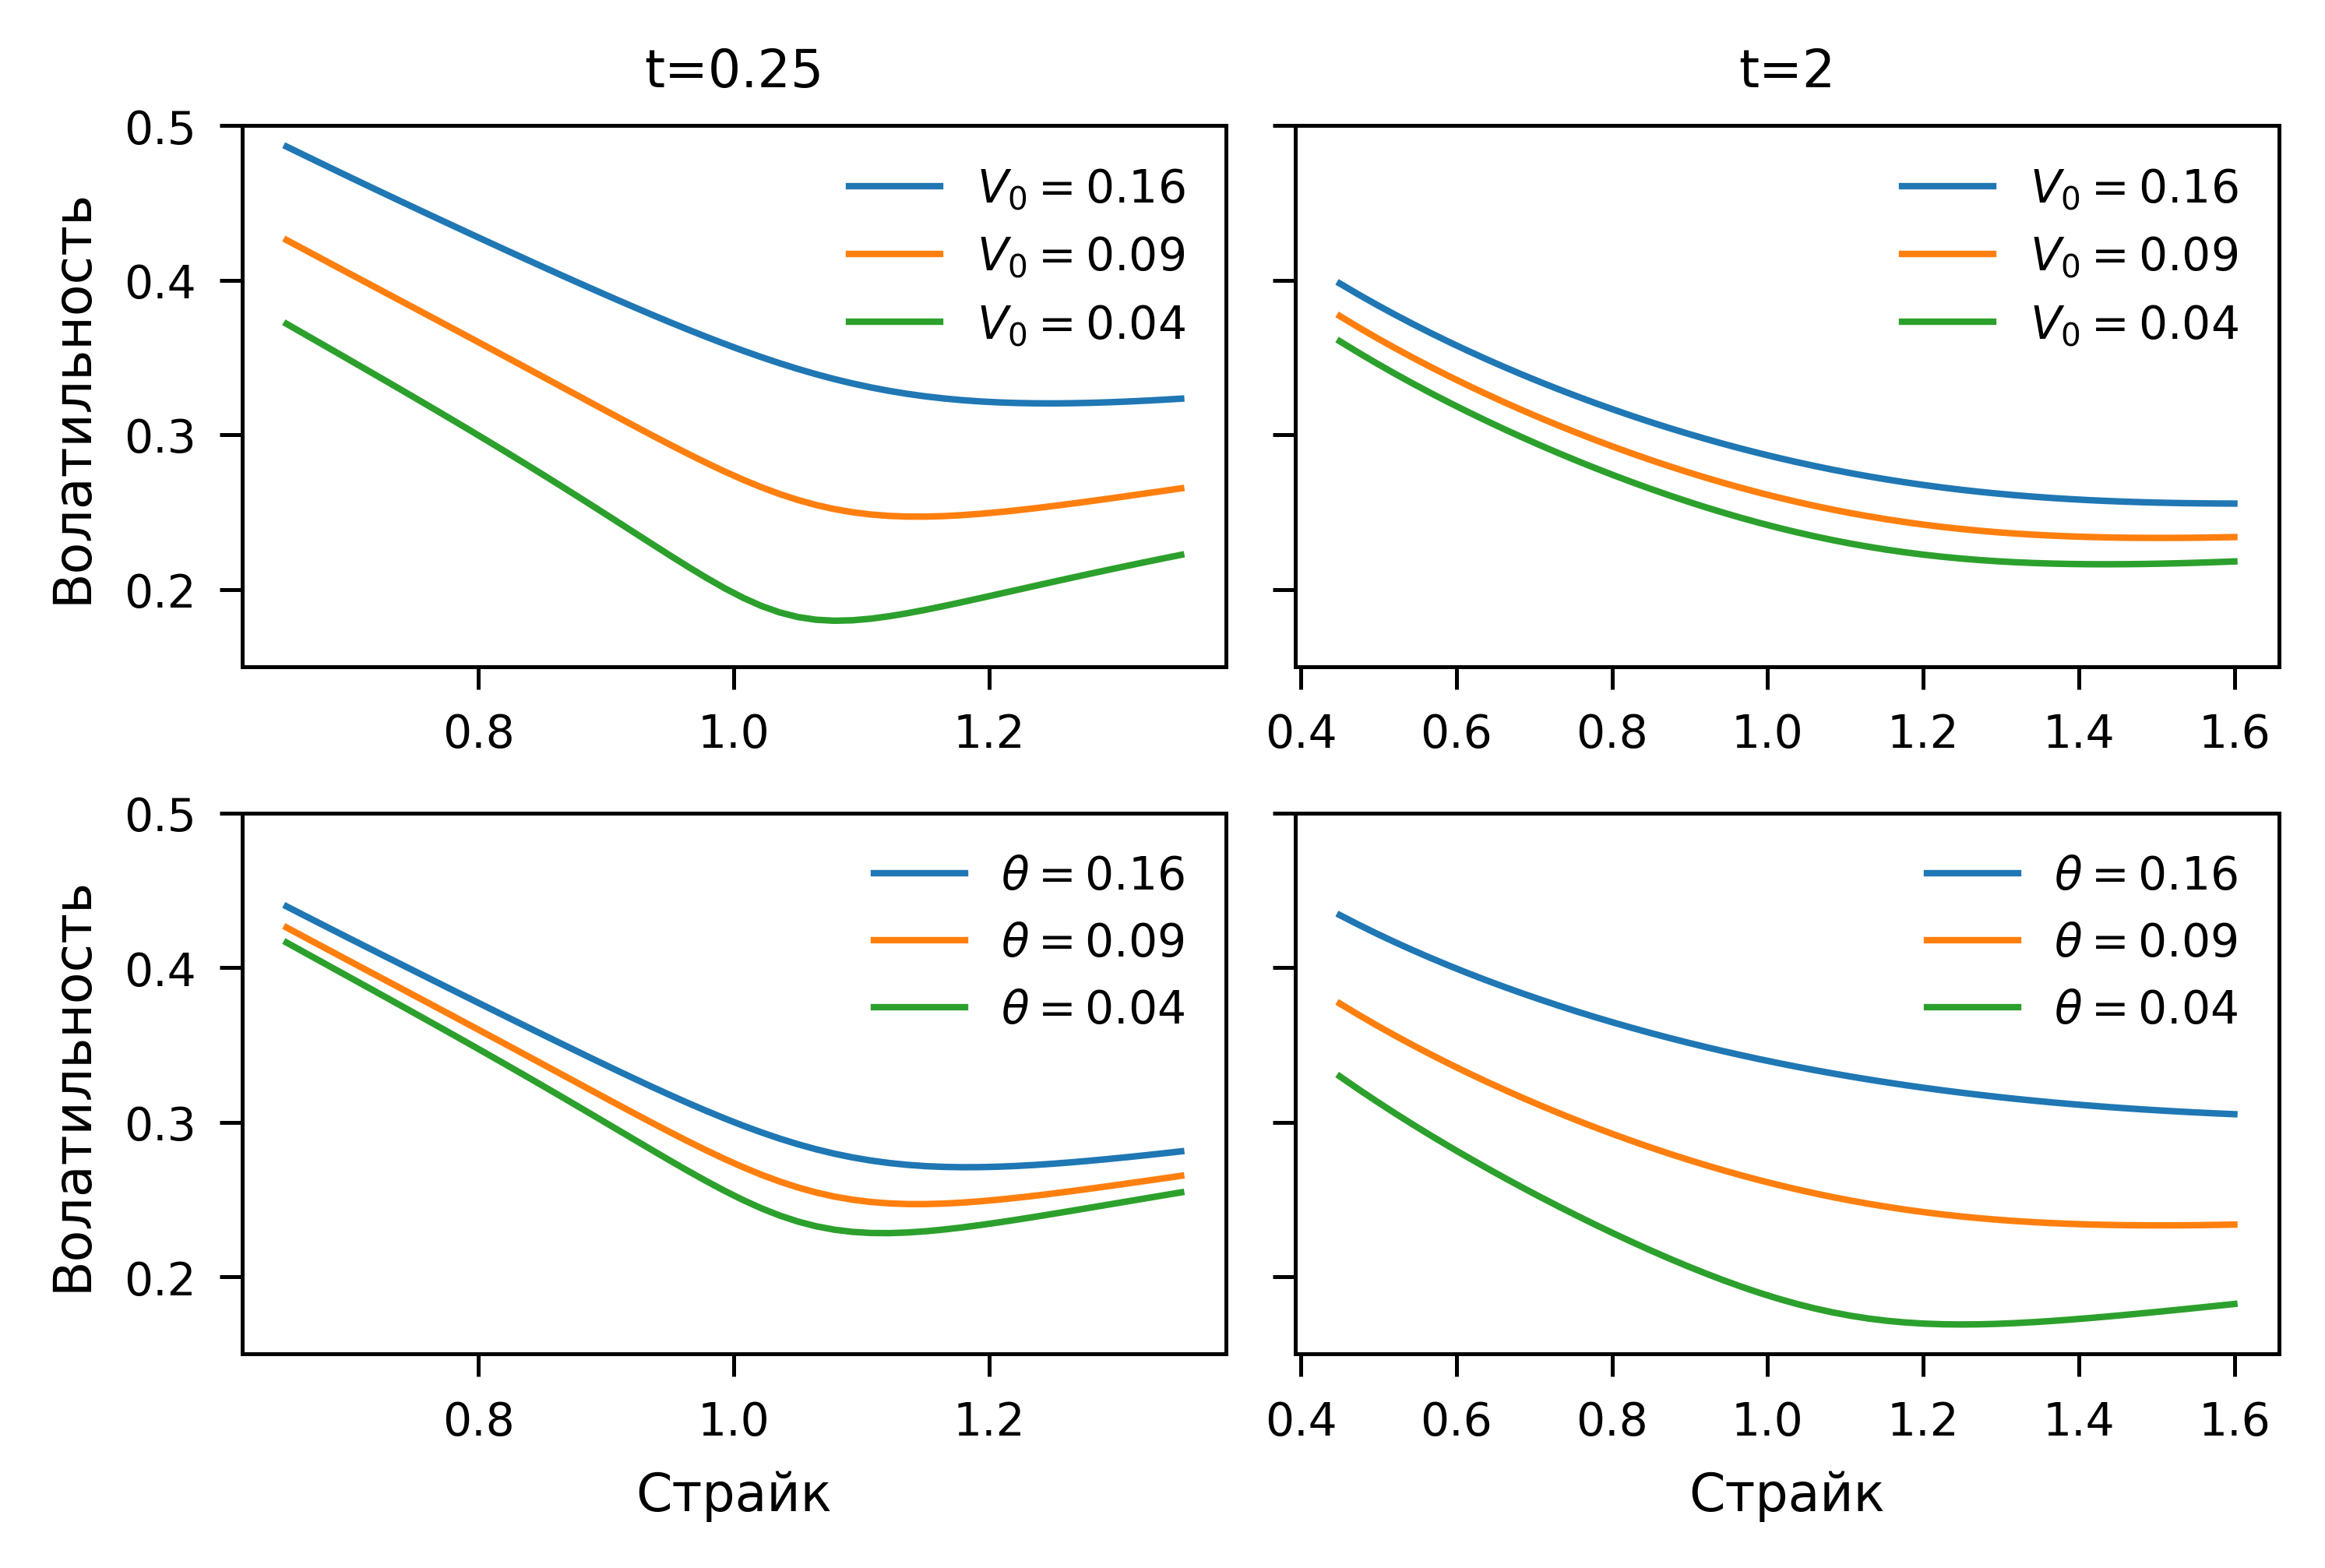

In [3]:
# Изменение V0 и theta 
fig, ax = plt.subplots(2, 2, figsize=(5.4*scale, 3.6*scale), constrained_layout=True, sharey=True)
ax[0,0].set_title('t=0.25')
ax[0,0].set_ylabel('Волатильность')
ax[0,1].set_title('t=2')
ax[1,0].set_ylabel('Волатильность')
ax[1,0].set_xlabel('Страйк')
ax[1,1].set_xlabel('Страйк')
ax[0,0].set_ylim(0.15, 0.5)

# V0
v1 = 0.04
v2 = 0.16
model1 = fm.Heston(v1, kappa, theta, sigma, rho)
model2 = fm.Heston(v2, kappa, theta, sigma, rho)
ax[0,0].plot(K1, model2.implied_vol(s, t0, K1), label=r"$V_0 = 0.16$")
ax[0,0].plot(K1, model.implied_vol(s, t0, K1), label=r"$V_0 = 0.09$")
ax[0,0].plot(K1, model1.implied_vol(s, t0, K1), label=r"$V_0 = 0.04$")
ax[0,0].legend(frameon=False)
ax[0,1].plot(K2, model2.implied_vol(s, t1, K2), label=r"$V_0 = 0.16$")
ax[0,1].plot(K2, model.implied_vol(s, t1, K2), label=r"$V_0 = 0.09$")
ax[0,1].plot(K2, model1.implied_vol(s, t1, K2), label=r"$V_0 = 0.04$")
ax[0,1].legend(frameon=False)

# theta
theta1 = 0.04
theta2 = 0.16
model1 = fm.Heston(v, kappa, theta1, sigma, rho)
model2 = fm.Heston(v, kappa, theta2, sigma, rho)
ax[1,0].plot(K1, model2.implied_vol(s, t0, K1), label=r"$\theta = 0.16$")
ax[1,0].plot(K1, model.implied_vol(s, t0, K1), label=r"$\theta = 0.09$")
ax[1,0].plot(K1, model1.implied_vol(s, t0, K1), label=r"$\theta = 0.04$")
ax[1,0].legend(frameon=False)
ax[1,1].plot(K2, model2.implied_vol(s, t1, K2), label=r"$\theta = 0.16$")
ax[1,1].plot(K2, model.implied_vol(s, t1, K2), label=r"$\theta = 0.09$")
ax[1,1].plot(K2, model1.implied_vol(s, t1, K2), label=r"$\theta = 0.04$")
ax[1,1].legend(frameon=False)

plt.show()

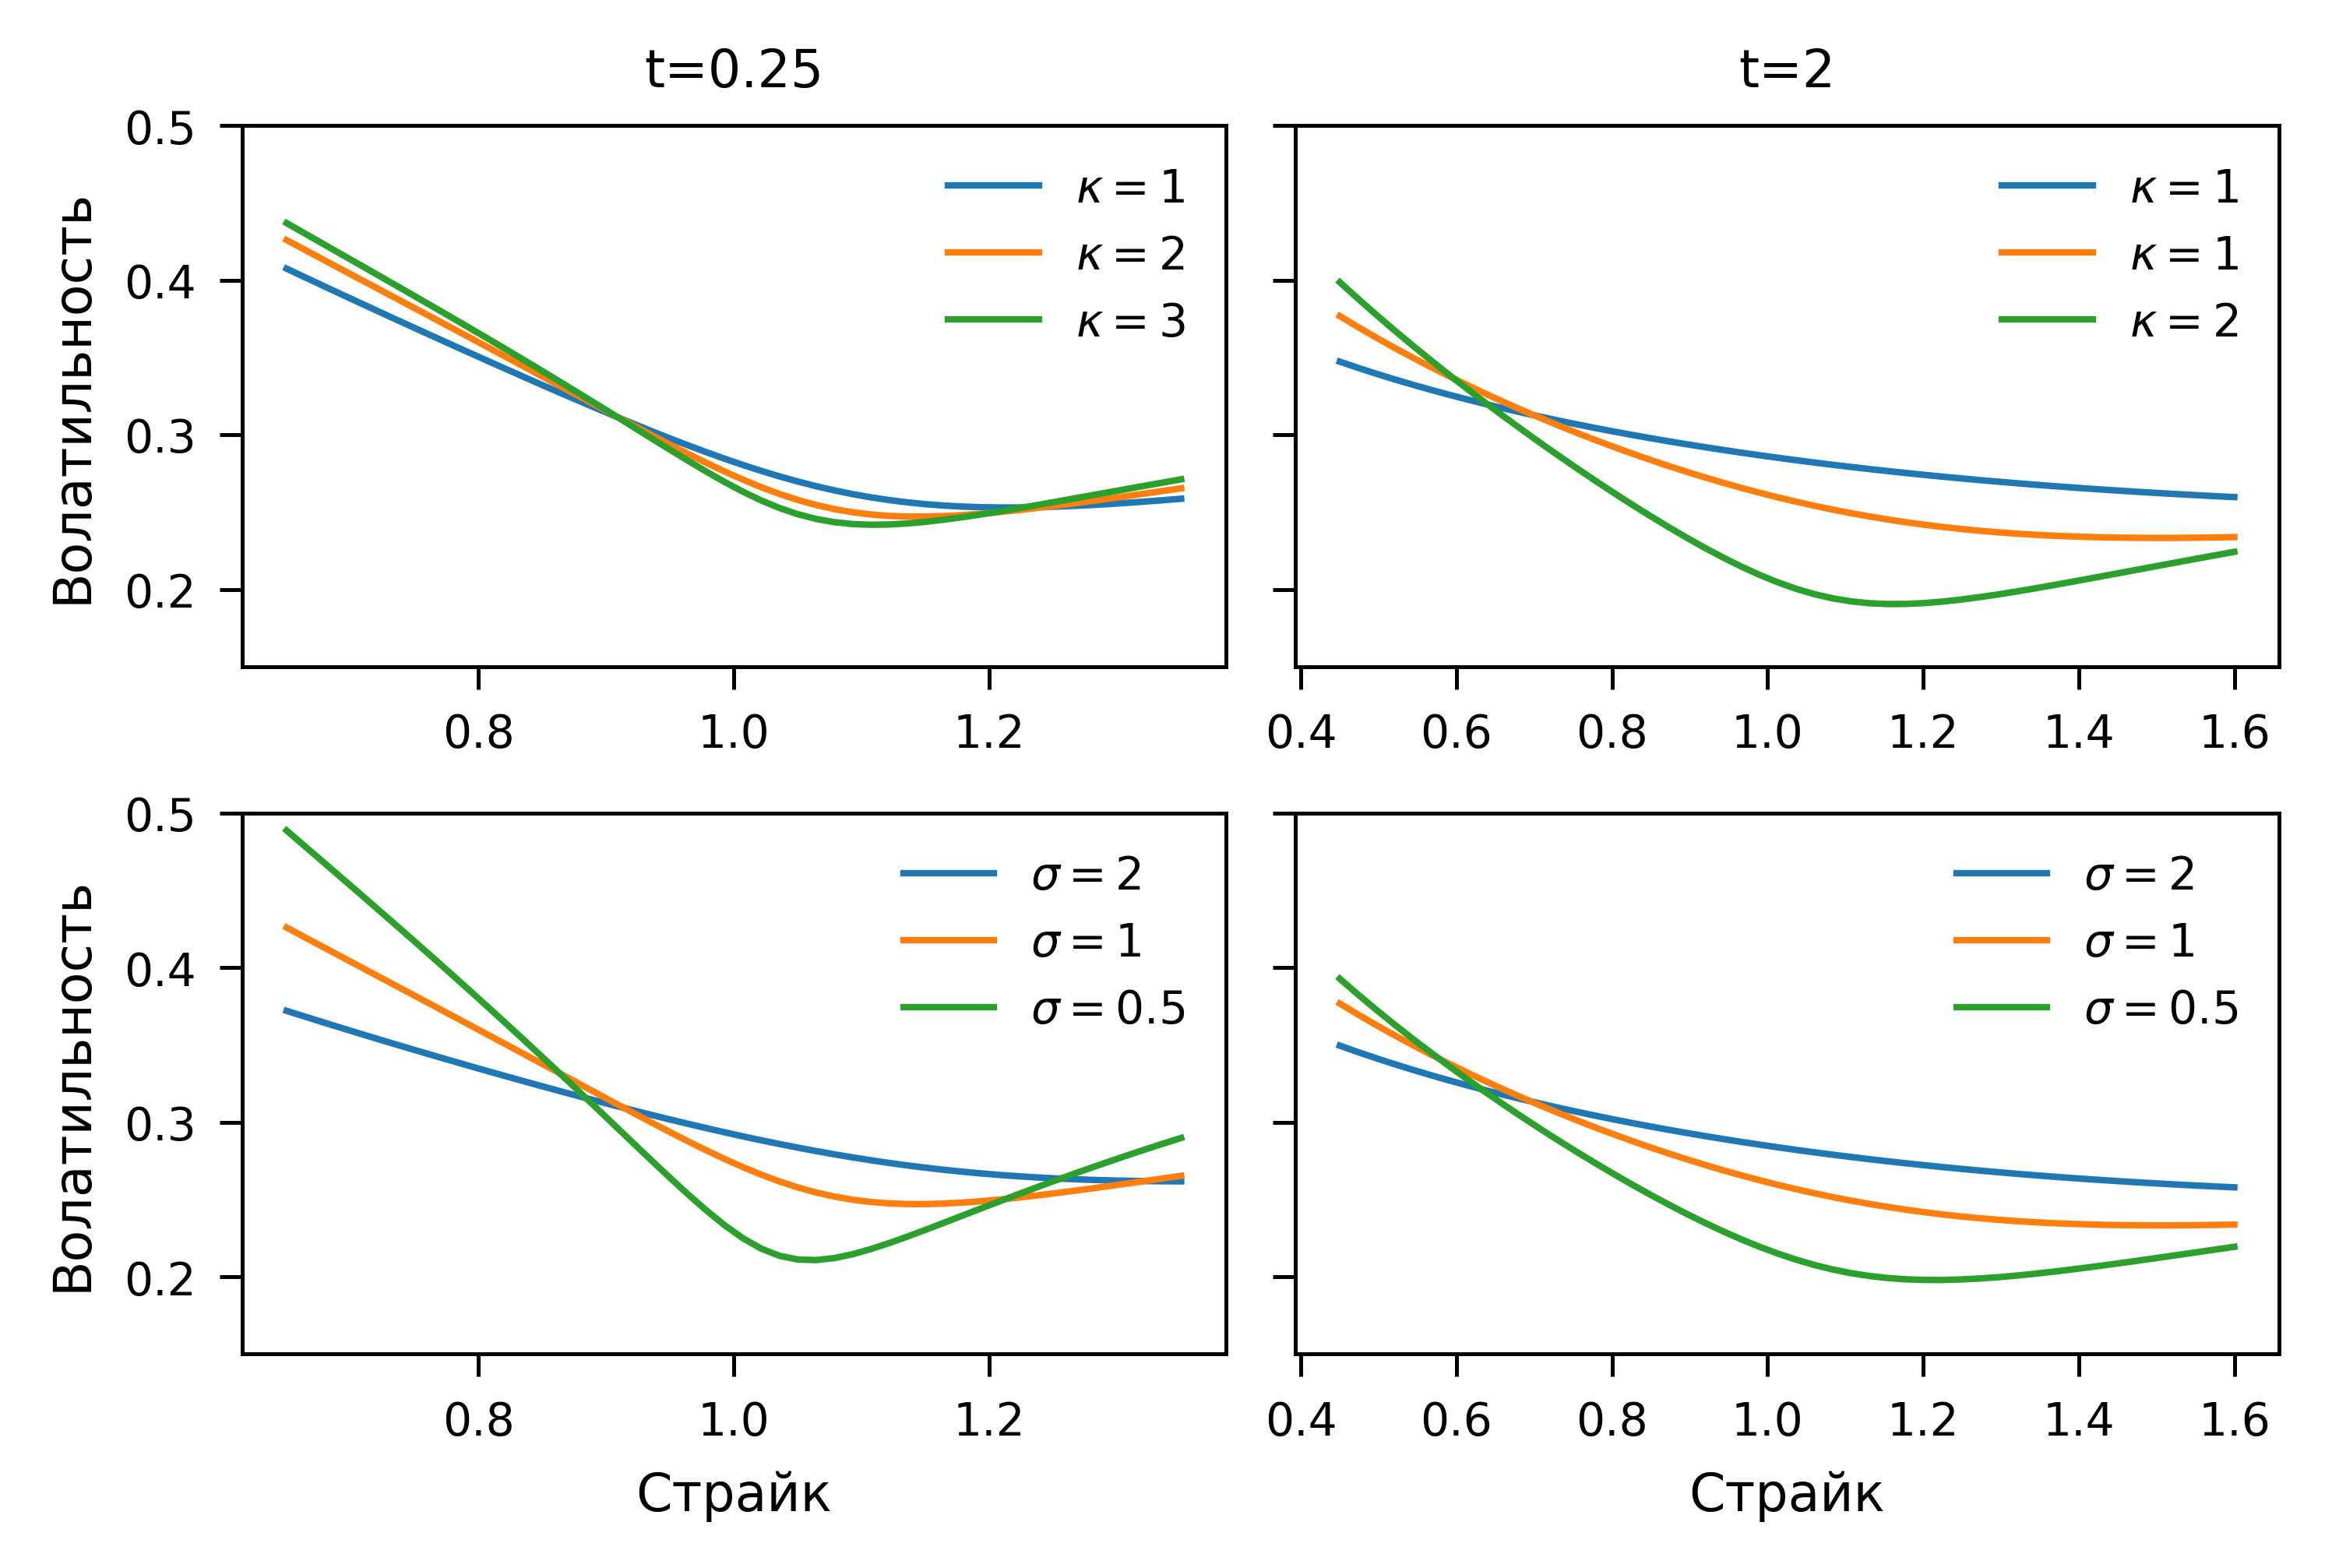

In [4]:
# Изменение kappa и sigma 
fig, ax = plt.subplots(2, 2, figsize=(5.4*scale, 3.6*scale), constrained_layout=True, sharey=True)
ax[0,0].set_title('t=0.25')
ax[0,0].set_ylabel('Волатильность')
ax[0,1].set_title('t=2')
ax[1,0].set_ylabel('Волатильность')
ax[1,0].set_xlabel('Страйк')
ax[1,1].set_xlabel('Страйк')
ax[0,0].set_ylim(0.15, 0.5)

# kappa
kappa1 = 0.5
kappa2 = 5
model1 = fm.Heston(v, kappa1, theta, sigma, rho)
model2 = fm.Heston(v, kappa2, theta, sigma, rho)
ax[0,0].plot(K1, model2.implied_vol(s, t0, K1), label=r"$\kappa = 1$")
ax[0,0].plot(K1, model.implied_vol(s, t0, K1), label=r"$\kappa = 2$")
ax[0,0].plot(K1, model1.implied_vol(s, t0, K1), label=r"$\kappa = 3$")
ax[0,0].legend(frameon=False)
ax[0,1].plot(K2, model2.implied_vol(s, t1, K2), label=r"$\kappa = 1$")
ax[0,1].plot(K2, model.implied_vol(s, t1, K2), label=r"$\kappa = 1$")
ax[0,1].plot(K2, model1.implied_vol(s, t1, K2), label=r"$\kappa = 2$")
ax[0,1].legend(frameon=False)

# sigma
sigma1 = 0.5
sigma2 = 2
model1 = fm.Heston(v, kappa, theta, sigma1, rho)
model2 = fm.Heston(v, kappa, theta, sigma2, rho)
ax[1,0].plot(K1, model1.implied_vol(s, t0, K1), label=r"$\sigma = 2$")
ax[1,0].plot(K1, model.implied_vol(s, t0, K1), label=r"$\sigma = 1$")
ax[1,0].plot(K1, model2.implied_vol(s, t0, K1), label=r"$\sigma = 0.5$")
ax[1,0].legend(frameon=False)
ax[1,1].plot(K2, model1.implied_vol(s, t1, K2), label=r"$\sigma = 2$")
ax[1,1].plot(K2, model.implied_vol(s, t1, K2), label=r"$\sigma = 1$")
ax[1,1].plot(K2, model2.implied_vol(s, t1, K2), label=r"$\sigma = 0.5$")
ax[1,1].legend(frameon=False)

plt.show()

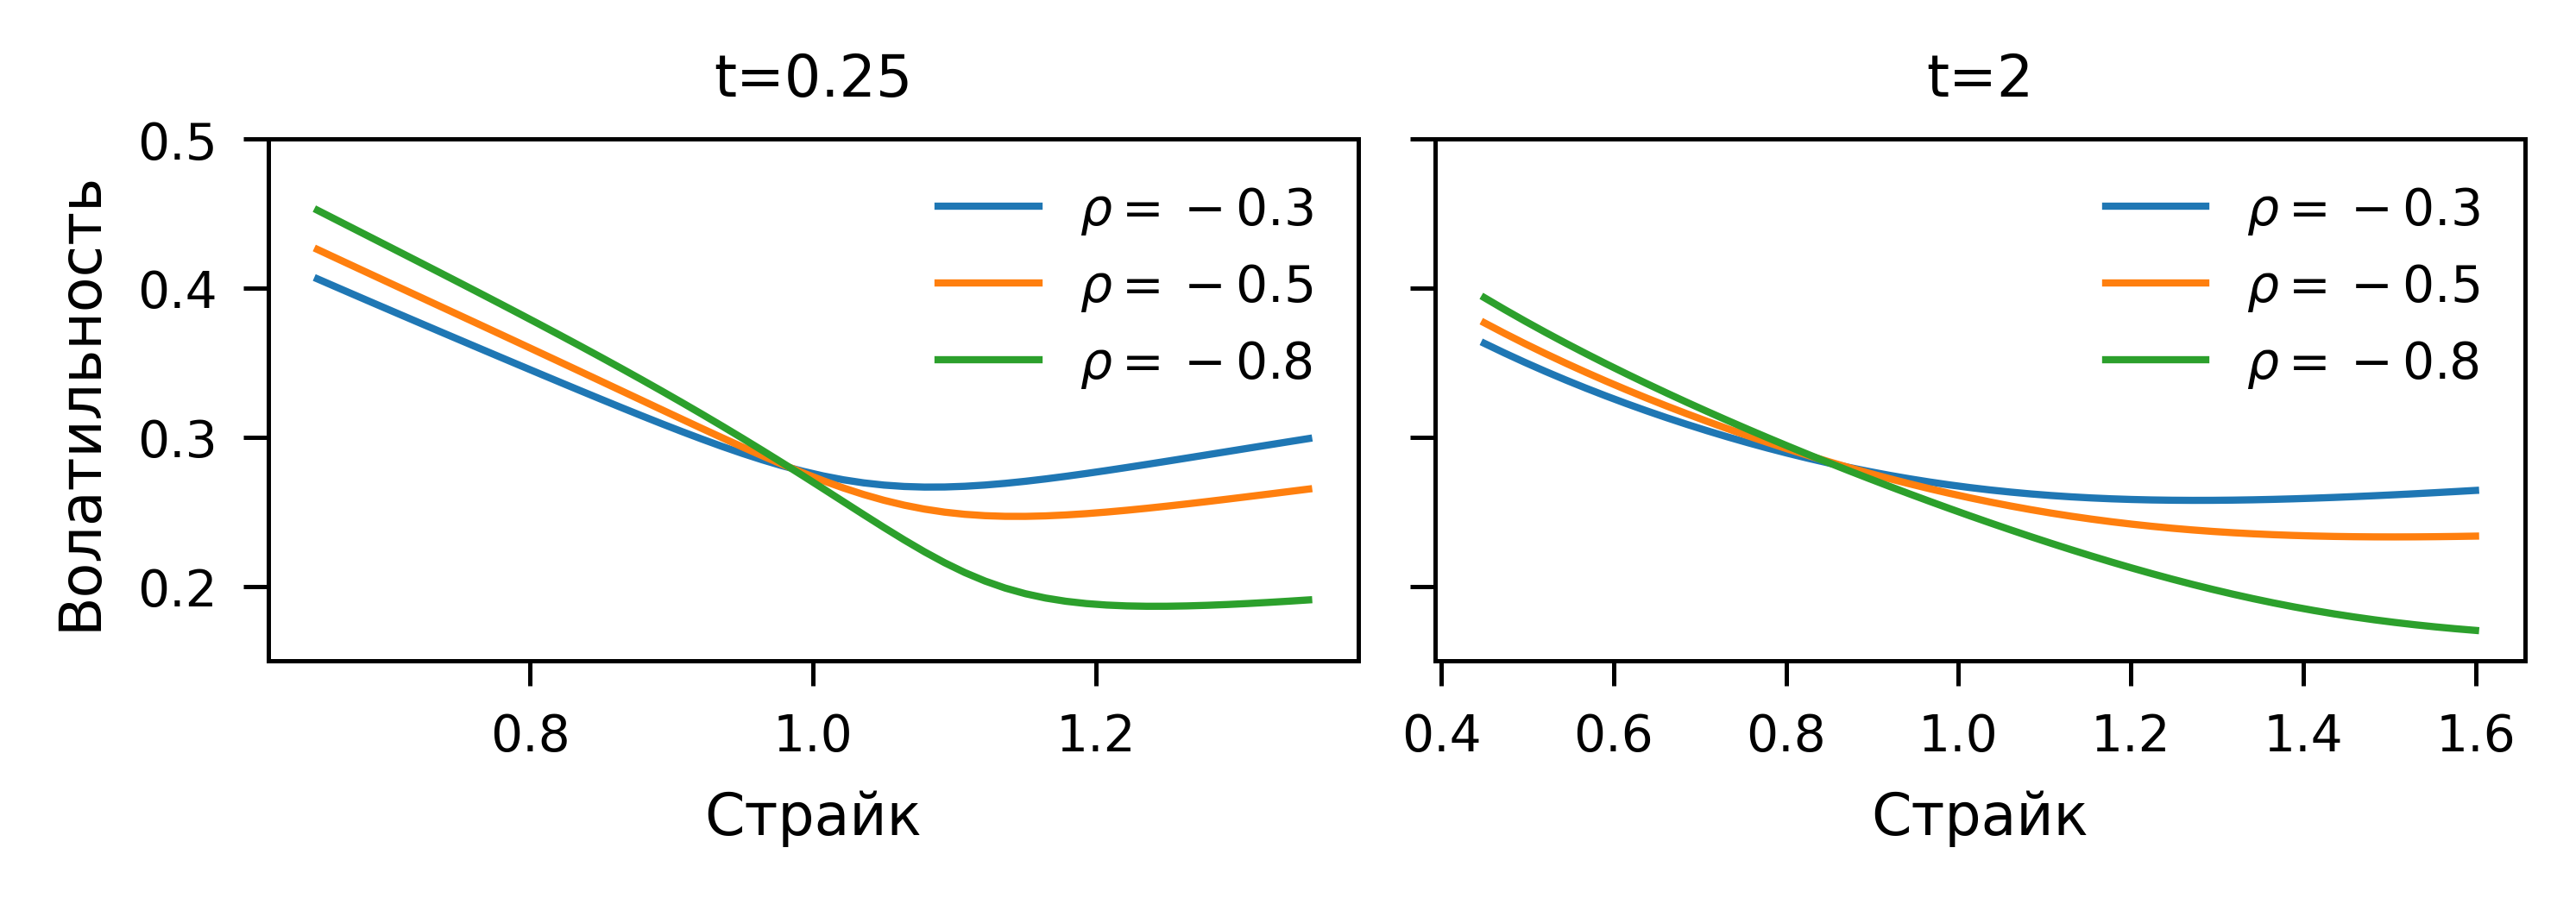

In [5]:
# Изменение kappa и sigma 
fig, ax = plt.subplots(1, 2, figsize=(5.4*scale, 1.8*scale), constrained_layout=True, sharey=True)
ax[0].set_title('t=0.25')
ax[0].set_ylabel('Волатильность')
ax[1].set_title('t=2')
ax[0].set_xlabel('Страйк')
ax[1].set_xlabel('Страйк')
ax[0].set_ylim(0.15, 0.5)

# kappa
rho1 = -0.3
rho2 = -0.8
model1 = fm.Heston(v, kappa, theta, sigma, rho1)
model2 = fm.Heston(v, kappa, theta, sigma, rho2)
ax[0].plot(K1, model1.implied_vol(s, t0, K1), label=r"$\rho = -0.3$")
ax[0].plot(K1, model.implied_vol(s, t0, K1), label=r"$\rho = -0.5$")
ax[0].plot(K1, model2.implied_vol(s, t0, K1), label=r"$\rho = -0.8$")
ax[0].legend(frameon=False)
ax[1].plot(K2, model1.implied_vol(s, t1, K2), label=r"$\rho = -0.3$")
ax[1].plot(K2, model.implied_vol(s, t1, K2), label=r"$\rho = -0.5$")
ax[1].plot(K2, model2.implied_vol(s, t1, K2), label=r"$\rho = -0.8$")
ax[1].legend(frameon=False)

plt.show()

## Калибровка модели

In [ ]:
# Загрузка данных (см. intro.ipynb)

options = fm.volatility_surface_from_cboe('../data/spx_quotedata.csv', '../data/feds200628.csv', min_maturity=10/365, max_maturity=3)
print('Maturities:', options.maturity.unique())

Maturities: <DatetimeArray>
['2025-09-19 00:00:00', '2025-10-17 00:00:00', '2025-11-21 00:00:00',
 '2025-12-19 00:00:00', '2026-01-16 00:00:00', '2026-02-20 00:00:00',
 '2026-03-20 00:00:00', '2026-04-17 00:00:00', '2026-05-15 00:00:00',
 '2026-07-17 00:00:00', '2026-08-21 00:00:00', '2026-09-18 00:00:00',
 '2026-12-18 00:00:00', '2027-12-17 00:00:00']
Length: 14, dtype: datetime64[ns]


Model: Heston(v0=np.float64(0.005046234608181269), kappa=np.float64(7.100216061164999), theta=np.float64(0.05556401082183759), sigma=np.float64(4.170577807267007), rho=np.float64(-0.7672556654847579))


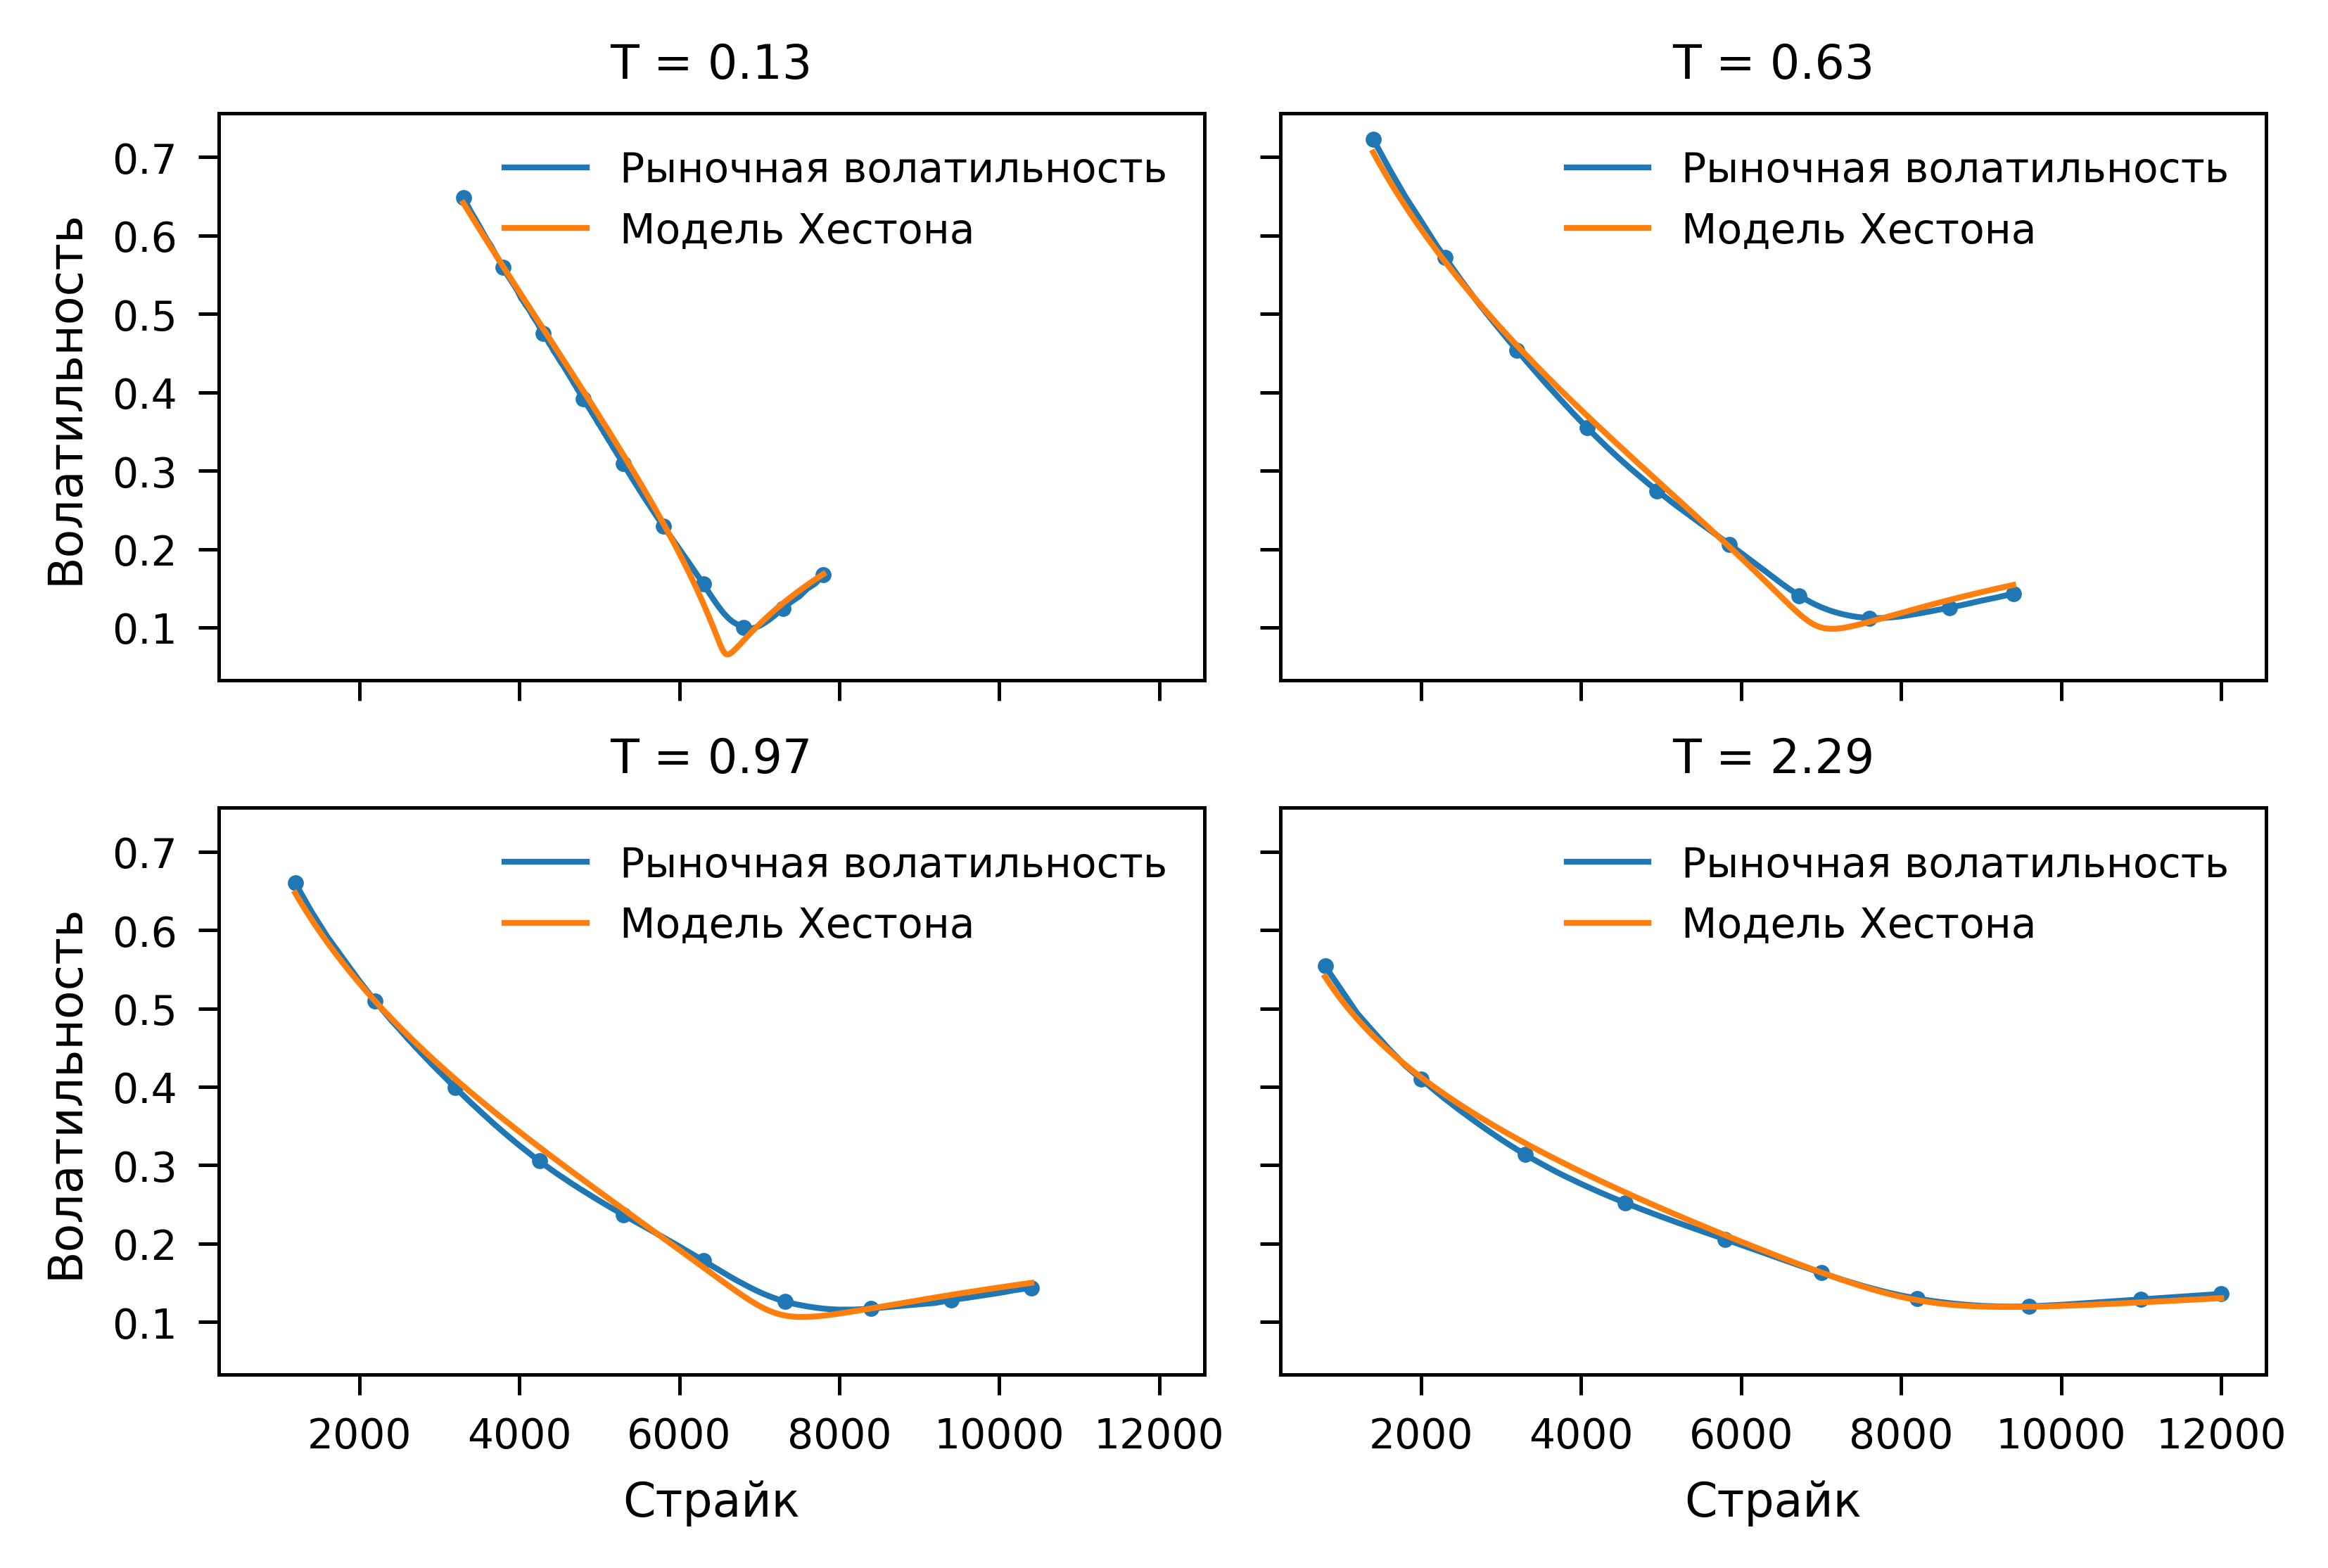

In [4]:
# Калибровка к двум улыбкам улыбкам
maturities = ['2025-10-17', '2026-04-17', '2026-08-21', '2027-12-17']
smiles = fm.choose_from_iv_surface(options, maturities, 10, 0.001, -0.001)
model = fm.Heston.calibrate(
    forward_price=smiles.forward_price.to_numpy(),
    maturity=smiles.time_to_maturity.to_numpy(),
    strike=smiles.strike.to_numpy(),
    implied_vol=smiles.implied_vol.to_numpy(),
    #optimization_params={'bounds': [(0, 1), (0, 5), (0, 1), (0, 2), (-0.99, 0)]} # см. ниже
)
print('Model:', model)

# График
fig, ax = plt.subplots(2, 2, figsize=(2.7*2, 1.8*2), constrained_layout=True, sharex=True, sharey=True)
ax = ax.flat
for i, m in enumerate(maturities):
    smile_small = smiles[smiles.maturity==m]
    smile_full = fm.choose_from_iv_surface(options, [m], None, 0.001, -0.001)
    # Рыночная улыбка
    ax[i].plot(smile_full.strike, smile_full.implied_vol, color='C0', label='Рыночная волатильность')
    # Точки, использовавшиеся для калибровки
    ax[i].scatter(smile_small.strike, smile_small.implied_vol, s=3, color='C0')
    # Улыбка в модели
    K_ = np.linspace(smile_small.strike.min(), smile_small.strike.max(), 200)
    ax[i].plot(K_, model.implied_vol(smile_small.forward_price.iloc[0], smile_small.time_to_maturity.iloc[0], K_),
            color='C1', label='Модель Хестона')
    ax[i].legend(frameon=False)
    ax[i].set_title(f'T = {smile_small.time_to_maturity.iloc[0]:.2f}')
ax[0].set_yticks([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7])
ax[0].set_ylabel('Волатильность')
ax[2].set_ylabel('Волатильность')
ax[2].set_xlabel('Страйк')
ax[3].set_xlabel('Страйк');

# В модели получаются неестественные параметры: большая kappa и sigma.
# Можно добавлять границы в оптимизацию